In [23]:
import pandas as pd
import datetime as dt
import seaborn as sns
import os
import subprocess
import matplotlib.pyplot as plt
import re
import numpy as np
import plotly.express as px

In [7]:
tracking_df = pd.read_csv("https://covidtracking.com/api/v1/states/daily.csv")

In [15]:
state = pd.read_csv('/Users/CharlesFederici/corona_python/dash_app/states.csv')

In [9]:
tracking_df['date'] = pd.to_datetime(tracking_df['date'], format='%Y%m%d')

In [18]:
tracking_df.head().transpose()

,0,1,2,3,4
date,2020-06-12 00:00:00,2020-06-12 00:00:00,2020-06-12 00:00:00,2020-06-12 00:00:00,2020-06-12 00:00:00
state,AK,AL,AR,AS,AZ
positive,625,23710,11547,0,32918
negative,70255,262675,169575,174,278318
pending,NaN,NaN,NaN,NaN,NaN
hospitalizedCurrently,15,622,203,NaN,1336
hospitalizedCumulative,NaN,2202,961,NaN,3622
inIcuCurrently,NaN,NaN,NaN,NaN,429
inIcuCumulative,NaN,658,NaN,NaN,NaN
onVentilatorCurrently,3,NaN,49,NaN,278


In [23]:
tracking_df[['date', 'state', 'positive', 
             'negative', 'positiveIncrease', 
             'negativeIncrease','dataQualityGrade']] \
    .to_csv("/Users/CharlesFederici/corona_python/data/testing.csv")

In [29]:
tracking_df_total = pd.read_csv("https://covidtracking.com/api/v1/us/daily.csv")
tracking_df_total['date'] = pd.to_datetime(tracking_df_total['date'], format='%Y%m%d')

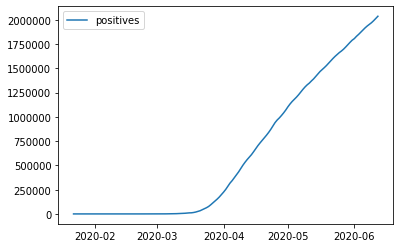

In [36]:
fig, ax = plt.subplots()
ax.plot(tracking_df_total['date'], tracking_df_total['positive'], label="positives")
ax.legend()

In [31]:
tracking_df_total.head().transpose()

,0,1,2,3,4
date,2020-06-12 00:00:00,2020-06-11 00:00:00,2020-06-10 00:00:00,2020-06-09 00:00:00,2020-06-08 00:00:00
states,56,56,56,56,56
positive,2037530,2013778,1991527,1970765,1953730
negative,2.04797e+07,1.99195e+07,1.9495e+07,1.90963e+07,1.86996e+07
pending,1783,1816,1737,1661,1606
hospitalizedCurrently,28524,29064,30203,30547,29969
hospitalizedCumulative,223281,221983,220602,219089,217581
inIcuCurrently,6012,6067,6242,6450,6394
inIcuCumulative,9373,9295,9225,9141,9013
onVentilatorCurrently,2734,2886,3020,3090,3240


In [126]:
# Separate data frames for begin - 3/21 and 3/22 to current

folder_location = '/Users/CharlesFederici/corona_python/data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'

files_to_read = os.listdir(folder_location)
case_reports_a = []
case_reports_b = []
for file_to_read in files_to_read:
    if re.match(r'.*.csv', file_to_read):
        df = pd.read_csv(folder_location + file_to_read)
        file_date = re.search(r"(.*)\.csv", file_to_read)
        df['report_date'] = pd.to_datetime(file_date.group(1))
        if pd.to_datetime(file_date.group(1)) <= pd.to_datetime("2020-03-21"):
            case_reports_a.append(df)
        else:
            case_reports_b.append(df)

case_reports_a = pd.concat(case_reports_a, axis=0, ignore_index=True)
case_reports_b = pd.concat(case_reports_b, axis=0, ignore_index=True)

In [99]:
for col in case_reports_a.columns:
    print(col)

Province/State
Country/Region
Last Update
Confirmed
Deaths
Recovered
report_date
Latitude
Longitude


In [98]:
for col in case_reports_b.columns:
    print(col)

FIPS
Admin2
Province_State
Country_Region
Last_Update
Lat
Long_
Confirmed
Deaths
Recovered
Active
Combined_Key
Incidence_Rate
Case-Fatality_Ratio
report_date


In [127]:
case_reports_a=case_reports_a.rename(columns={'Province/State':'province_state',
                                              'Country/Region':'country_region'}) \
                             .rename(str.lower, axis='columns') \
                             [['province_state', 'country_region', 'confirmed',
                               'deaths', 'recovered', 'report_date', 'latitude',
                               'longitude']]

case_reports_b['Province_State'] = case_reports_b["Province_State"].fillna("NA")
case_reports_b=case_reports_b.rename(str.lower, axis='columns') \
                             .rename(columns={'lat':'latitude',
                                              'long_':'longitude'}) \
                             .groupby(['province_state','country_region','report_date'], as_index=False) \
                             .agg({'confirmed':'sum',
                                   'deaths':'sum',
                                   'recovered':'sum',
                                   'longitude':'mean',
                                   'latitude':'mean'}) \
                             [['province_state', 'country_region', 'confirmed',
                               'deaths', 'recovered', 'report_date', 'latitude',
                               'longitude']]

case_reports_joined = pd.concat([case_reports_a, case_reports_b], axis=0)

case_reports_joined["country_region"] = case_reports_joined["country_region"].str.replace(r'(.*)?(Korea)(.*)?', "South Korea")
case_reports_joined["country_region"] = case_reports_joined["country_region"].str.replace(r'(.*)?(China)(.*)?', "China")


case_reports_joined = case_reports_joined \
                            .groupby(['province_state','country_region','report_date'], as_index=False) \
                            .agg({'confirmed':'sum',
                                   'deaths':'sum',
                                   'recovered':'sum',
                                   'longitude':'mean',
                                   'latitude':'mean'})

In [128]:
case_reports_joined[case_reports_joined['country_region'] == "South Korea"]

,province_state,country_region,report_date,confirmed,deaths,recovered,longitude,latitude
28123,NA,South Korea,2020-03-22,8897.0,104.0,2909.0,127.766922,35.907757
28124,NA,South Korea,2020-03-23,8961.0,111.0,3166.0,127.766922,35.907757
28125,NA,South Korea,2020-03-24,9037.0,120.0,3507.0,127.766922,35.907757
28126,NA,South Korea,2020-03-25,9137.0,126.0,3730.0,127.766922,35.907757
28127,NA,South Korea,2020-03-26,9241.0,131.0,4144.0,127.766922,35.907757
...,...,...,...,...,...,...,...,...
28208,NA,South Korea,2020-06-15,12155.0,278.0,10760.0,127.766922,35.907757
28209,NA,South Korea,2020-06-16,12198.0,279.0,10774.0,127.766922,35.907757
28210,NA,South Korea,2020-06-17,12257.0,280.0,10800.0,127.766922,35.907757
28211,NA,South Korea,2020-06-18,12306.0,280.0,10835.0,127.766922,35.907757


In [110]:
case_reports_b['country_region'].unique().tolist()

['Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'US',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Cruise Ship',
 'Denmark',
 'France']

In [129]:
case_reports_prior_day = case_reports_joined.copy()
case_reports_prior_day['report_date'] = case_reports_prior_day['report_date'] + dt.timedelta(days=1)
case_reports_prior_day = case_reports_prior_day.rename({'confirmed':'confirmed_pd',
                                                        'deaths':'deaths_pd',
                                                        'recovered':'recovered_pd'}, axis="columns") \
                                               .drop(['latitude', 'longitude'], axis=1)
case_reports_prior_day

,province_state,country_region,report_date,confirmed_pd,deaths_pd,recovered_pd
0,"Montreal, QC",Canada,2020-02-29,1.0,0.0,0.0
1,"Montreal, QC",Canada,2020-03-01,1.0,0.0,0.0
2,"Montreal, QC",Canada,2020-03-02,1.0,0.0,0.0
3,"Montreal, QC",Canada,2020-03-03,1.0,0.0,0.0
4,"Montreal, QC",Canada,2020-03-04,1.0,0.0,0.0
...,...,...,...,...,...,...
42640,Zhytomyr Oblast,Ukraine,2020-06-16,1087.0,19.0,547.0
42641,Zhytomyr Oblast,Ukraine,2020-06-17,1101.0,20.0,559.0
42642,Zhytomyr Oblast,Ukraine,2020-06-18,1147.0,21.0,574.0
42643,Zhytomyr Oblast,Ukraine,2020-06-19,1154.0,21.0,583.0


In [130]:
case_reports_joined = case_reports_joined.merge(case_reports_prior_day,
                                                how='left',
                                                left_on=['province_state','country_region','report_date'],
                                                right_on=['province_state','country_region','report_date'],
                                               validate='one_to_one')

case_reports_joined['incremental_confirmed'] = case_reports_joined['confirmed'] - case_reports_joined['confirmed_pd']
case_reports_joined['incremental_deaths'] = case_reports_joined['deaths'] - case_reports_joined['deaths_pd']
case_reports_joined['incremental_recovered'] = case_reports_joined['recovered'] - case_reports_joined['recovered_pd']

In [131]:
def make_keep_col(df, province_col, country_col):
    df['keep'] = np.where(df[country_col] == 'US',
                          np.where(df[province_col].isin(state.State),
                                   1, 0),1)
    return(df)

case_reports_joined = make_keep_col(case_reports_joined, 'province_state', 'country_region')

#Step 5: Create country set
case_reports_country = case_reports_joined[(case_reports_joined['keep'] == 1) | (case_reports_joined['province_state'] == "Recovered")] \
                            .groupby(['country_region', 'report_date'], as_index=False) \
                            .agg({'confirmed':'sum',
                                  'deaths':'sum',
                                  'recovered':'sum',
                                  'incremental_confirmed':'sum',
                                  'incremental_deaths':'sum',
                                  'incremental_recovered':'sum'})
case_reports_country['active'] = case_reports_country['confirmed'] - case_reports_country['deaths'] - case_reports_country['recovered']
case_reports_country['incremental_active'] = case_reports_country['incremental_confirmed'] - case_reports_country['incremental_deaths'] - case_reports_country['incremental_recovered']

case_reports_states=case_reports_joined[(case_reports_joined['country_region']=='US') & (case_reports_joined['keep']==1)]


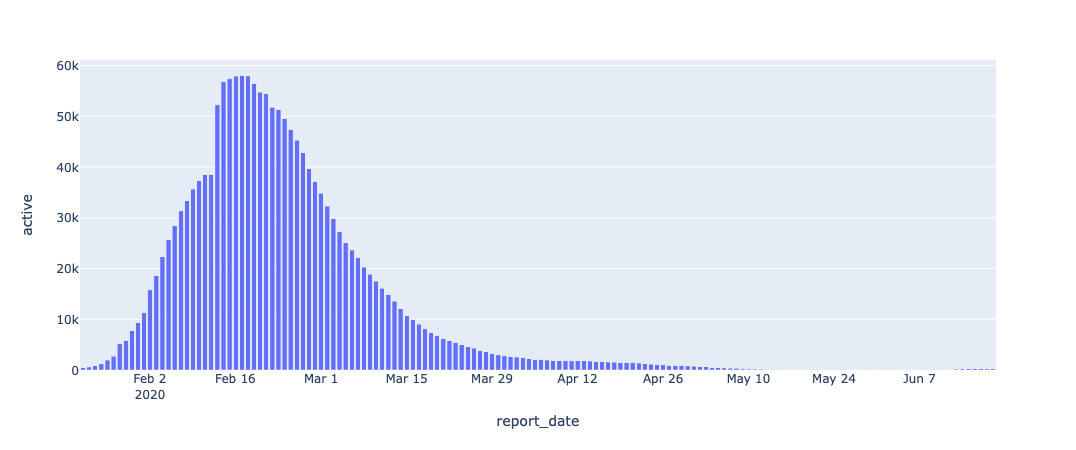

In [136]:


px.bar(case_reports_country[case_reports_country['country_region'] == "China"], x="report_date", y="active")

In [65]:
case_reports_joined["country_region"].str.replace(r'(.*)(Korea)(.*)', "South Korea")
case_reports_joined["country_region"].str.replace(r'(.*)(China)(.*)', "")

0        Mainland China
1        Mainland China
2        Mainland China
3           South Korea
4        Mainland China
              ...      
28284           Ukraine
28285           Ukraine
28286           Ukraine
28287           Ukraine
28288           Ukraine
Name: country_region, Length: 28289, dtype: object

In [ ]:
# Create State Data Table